<!--start-block-->
<hr style="height: 1px;">
<i>This code was authored by the 8.S50x Course Team, Copyright 2021 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

# LECTURE 9

In this class, we will formalize how we actualy make a scientific hypothesis and test it. 

<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 9.0 Overview of Learning Objectives

In this lecture we will explore the following objectives:

- t-test
- f-test
- Fitting for the Higgs boson signal Background
- Fitting For the Higgs Boson
- Combining p-values
- Building Interpolated distributions
- Dealing with non-analytic forms
<br>
<!--end-block-->

## 9.0 t-test

Now, just a fun aside. In addtiion to the $\chi^{2}$ test there is an another hypothesis test that was created known as the t-test. The origin of the t-test is that Guiness beer brewers were looking to compare beers from different sets of barley to see if they had a similar flavor. The issue was that they only had a few batches of barley, and a few batches of beer to compare distributions, in the limit of small number, we cannot assume distributions are gaussian, and, as a consequence, we cannot use the $\chi^{2}$ test. In light of this, the ["Student t-test"](https://en.wikipedia.org/wiki/Student%27s_t-test) was invented by William Gossett. Its called student t-test because Gossett published his paper as "student" to avoid Guiness beer proprietary regulations. 

The t-test, says that for $N$ samples $x_{1},...,x_{n}$ each from an underlying Guassian distribution with mean $\mu$ and variance $\sigma^{2}$, we can define the following measured mean ($\bar{x}$) and variance($s^{2}$): 
\begin{equation}
\bar{x} = \frac{1}{N}\sum_{i} x_{i} \\
s^{2}   = \frac{1}{N-1}\sum_{i} \left(x_{i}-\bar{x}\right)^{2}\\
\end{equation}
And the distribution of the mean and variance combined defined as the t-statistic
\begin{equation}
t = \frac{\bar{x}-\mu}{S/\sqrt{N}}
\end{equation}
will follow a $t$ distriubtion of $\nu=N-1$ degrees of freedom, given by
\begin{equation}
 t(x) = \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu\pi}\Gamma\left(\frac{\nu}{2}\right)} \left(1+\frac{x^2}{\nu}\right)^{-\frac{\nu+1}{2}}
\end{equation}

The t-distribution is a low-stats combination of binomial distributions. In practice, this gives us another way to test if two distributions are equal. This one avoids using histograms. Let's see how it behaves. Lets run a t-test to see how far our distributions are from $\mu=0$

/Users/pharris/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys
/Users/pharris/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/pharris/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/pharris/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/pharris/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/pharris/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in dou

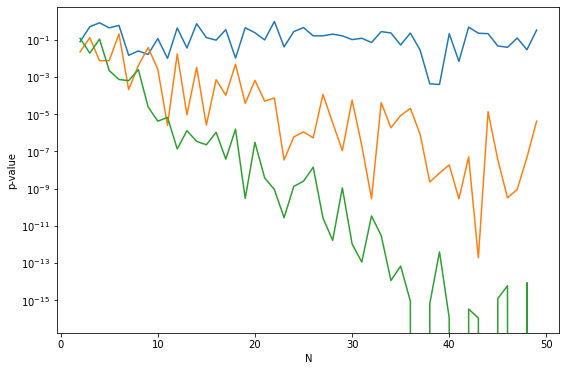

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#now lets test the consistency of that our observation is consistent
def ttest(isamples,iMu=0):
    t = (isamples.mean()-iMu)/(isamples.std()/np.sqrt(len(isamples)))
    p = 1 - stats.t.cdf(t,df=len(isamples)-1)
    return p

xvals=[]
pvalues1=[]
pvalues2=[]
pvalues3=[]
for i0 in range(50):
    testsamples1 = np.random.normal(0.2,1, i0)
    pvalue = ttest(testsamples1)
    pvalues1.append(pvalue)
    testsamples2 = np.random.normal(1,1, i0)
    pvalue = ttest(testsamples2)
    pvalues2.append(pvalue)
    testsamples3 = np.random.normal(2,1, i0)
    pvalue = ttest(testsamples3)
    pvalues3.append(pvalue)
    xvals.append(i0)

fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
ax.plot(xvals,pvalues1,label="\mu=0.2")
ax.plot(xvals,pvalues2,label="\mu=1.0")
ax.plot(xvals,pvalues3,label="\mu=2.0")
ax.set_xlabel('N')
ax.set_ylabel('p-value')
ax.set_yscale('log')
plt.show()

As you can see this is a bit easier to compute that a likelihood or $\chi^{2}$ test, and in general its more sensitive. This is allows us to take into account the full set of distributions. 

For completeness, the general form to compare two distribution, the modified t-statistic becomes: 

\begin{equation}
t = \frac{\bar{x}_{a}-\bar{x}_{b}}{s\left(\frac{1}{N_{a}} + \frac{1}{N_{b}} \right)} \\
s = \sqrt{\frac{(N_{a}-1)s_{a}^2 + (N_{b}-1)s_{b}^2 }{N_{a}+N_{b}-2} }
\end{equation}

Where $s_{a}^2$ is the variance of $x_{a}$ and $\bar{x}_{a}$ is its mean, and the same goes for $b$. This distribution becomes most useful, when we only have a few events.

This again follows a $t$ distribution with number of degrees of freedom given by $\nu=N_{a}+N_{b}-2$. Note that if the variances are large between the two distributions, this statistic breaks down. See [here](https://en.wikipedia.org/wiki/Student%27s_t-test) for more details.

### Challenge 

Compute the t-statistic p-value for two gaussian distributions of different means with 50 events?
Why is it so much more powerful than the $\chi^{2}$ statistic? 

In [5]:
testSamplesA = np.random.normal(0  ,1, 50)
testSamplesB = np.random.normal(0.2,1, 50)

#solution
def ttest_comp(iSamplesA,iSamplesB):
    s2 = (len(iSamplesA)-1)*iSamplesA.std()**2 + (len(iSamplesB)-1)*iSamplesB.std()**2
    s2 = s2/(len(iSamplesA)+ len(iSamplesB) - 2)
    s  = np.sqrt(s2)*(1/len(iSamplesA) + 1/len(iSamplesB))
    t  = (iSamplesA.mean()-iSamplesB.mean())/s
    p  = stats.t.cdf(t,df=len(iSamplesA)+len(iSamplesB)-2)
    return p
print(ttest_comp(testSamplesA,testSamplesB))
#its more powerful, because the chi2 distribution assuems binning. Consider doing the chi2 statistic with many bins

0.3660636206571557


## 9.2 f-test (Chow-test)

In the interest of generalizing the t-test, the statistician Ronald Fisher developed the [f-test](https://en.wikipedia.org/wiki/F-test). This is really a generalization of t-test. This has become very useful in physics due to the work of Gregory Chow at MIT in the late 1950s. At that time, he developed the Chow test aimed at trying to come up with a way for how well a fit is behaving. To undersand the chow-test lets delve into the the f-test. 

The f-test is used when you want to compare a few distributions with each other. Imagine for example you have $N$ groups of data, each with $m$ points. If these samples are all from a Gaussian distribution of mean $\mu$ and variance $\sigma^{2}$, ie $\mathcal{N}(x,\mu,\sigma)$. Then we can define a new statistic defined conceptually as 
\begin{equation}
 f = \frac{\rm variance~across~samples}{\rm variance~within~each~sample}  
\end{equation}
which should be close to 1 if the samples are all from the same underlying distribution, but it should not be 1 if the samples are from different distributions. 

Lets say we have two distributions $a$ and $b$ each with number of degrees of freedom given by $n_{a}$ and $n_{b}$, we can then write the f-distribution as the ratio of their variances: 
\begin{equation}
 f = \frac{\frac{S^{2}_{a}}{n_{a}} }{ \frac{S^{2}_{b}}{n_{b}} }\\
\end{equation}

More generally, we can write the f-statistic as the variance of distinct samples over the average variance over the individual samples. For a total amount of $N$ samples with $K$ groups, each with $n_{i}$ events within and mean $\bar{x}_{i}$, we can write the f-statistic as 
\begin{equation}
 \sigma^{2}_{\rm group} = \frac{1}{K-1}\sum_{i=1}^{K} n_{i} \left(\bar{x}_{i}-\bar{x}\right)^2 \\
 \sigma^2 = \frac{1}{N-K}\sum_{i=1}^{K}\sum_{j=1}^{n_{i}}\left(x_{ij}-\bar{x}_{i}\right)^{2}\\ 
 f = \frac{  \sigma^{2}_{\rm group} }{\sigma^{2}}
\end{equation}
The idea is that the numerator and denominator are both $\chi^{2}$ distributed variables with $K-1$ degrees of freedom on top, and $N-K$ degrees of freedom on the bottom. This statistic is most powerful for checking if the variances are consistent with being from the same distribution or a different distribution. 

From the above formulas, it has been derived that the f-statistic follows [$f$-distribution](https://en.wikipedia.org/wiki/F-distribution), which has a very complex form that we will write here once for posterity. 
\begin{equation}
f(x,d_{1}=K-1,d_{2}=N-K) = \frac{1}{\beta\left(\frac{d_{1}}{2},\frac{d_{2}}{2}\right)}\left(\frac{d_{1}}{d_{2}}\right)^{\frac{d_{1}}{2}}x^{\frac{d_{1}}{2}-1}\left(1+\frac{d_{1}}{d_{2}}x\right)^{-\frac{d_{1}+d_{2}}{2}}\\
\end{equation}
where $\beta(x,y)$ is the [$\beta$-function](https://en.wikipedia.org/wiki/Beta_function).

So why do we care about the f-test? 

Recall, that to get a good fit you want the fit residuals to look like a gaussian distribution. Unfortunately, its often that case that the fit residuals are not gaussian. Lets say you fit a line to a distribution, and the fit is not good. 

Well then you can try fitting a more complicated function, how about a quadratic. The residuals seem better. 

What about a 3rd order polynomial? 

When do we know where to stop. That is where the f-statistic can help us. The idea is that we can compare the fit residuals from each function. If the fit residual ratio has a high likeilhood given an f-distribution, then we know that the additional polynomial is not needed. 

More generally, the f-distribution tells you how do you tell that fit is better? One ways is to see if the $\chi^{2}$ is better, but what if the $\chi^{2}$ is approximately the same? Moreover what if your $\chi^{2}$ was originally good, but not gaussian. Comparing the residuals of the two fits, can tell us if our new fit function is actually better. The f-test helps us quantify this. 


Well lets say we want to compare the variance of two fits. 
If they variances are from the same underlying distribution they will follow the f-statistic. This comes up when we are trying to figure out if our fit is actually working. 

To do that, lets try to fit some Higgs boson data, lets load 2011, Higgs boson to two photons. First lets look at the data. 


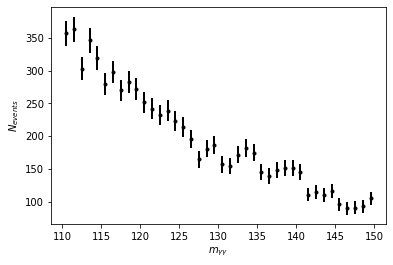

In [48]:
import numpy as np
import csv
import matplotlib.pyplot as plt

#Lets fit a bunch of polynomails with lmfit
x = []
y = []
y_err = []
label='out_2011.txt'
with open(label,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=' ')
    for row in plots:
        if float(row[1]) > 150 or float(row[1]) < 110:
            continue
        x.append(float(row[1]))
        y.append(float(row[2]))
        #add poisson uncertainties                                                                                                 
        y_err.append(np.sqrt(float(row[2])))

weights = np.linspace(0.,len(y),num=len(y))
for i0 in range(len(y)):
    weights[i0] = float(1./y_err[i0])

#Now we plot it. 
plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0)
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$N_{events}$")
plt.show()

Ok, this is a falling distribution, its not obvious what to fit this with. Lets just fit it with a bunch of polynomial functions, and see how it works. 

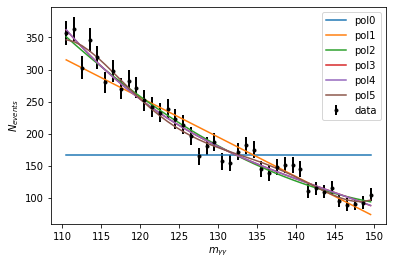

In [49]:
import lmfit 

def pol0(x,p0):
    pols=[p0]
    y = np.polyval(pols,x)
    return y

def pol1(x,p0,p1):
    pols=[p0,p1]
    y = np.polyval(pols,x)
    return y

def pol2(x, p0, p1,p2):
    pols=[p0,p1,p2]
    y = np.polyval(pols,x)
    return y

def pol3(x, p0, p1,p2,p3):
    pols=[p0,p1,p2,p3]
    y = np.polyval(pols,x)
    return y

def pol4(x, p0, p1,p2,p3,p4):
    pols=[p0,p1,p2,p3,p4]
    y = np.polyval(pols,x)
    return y

def pol5(x, p0, p1,p2,p3,p4,p5):
    pols=[p0,p1,p2,p3,p4,p5]
    y = np.polyval(pols,x)
    return y

def fitModel(iX,iY,iWeights,iFunc):
    model  = lmfit.Model(iFunc)
    p = model.make_params(p0=0,p1=0,p2=0,p3=0,p4=0,p5=0)
    result = model.fit(data=iY,params=p,x=iX,weights=iWeights)
    #result = lmfit.minimize(binnedLikelihood, params, args=(iX,iY,(iY**0.5),iFunc))
    output = model.eval(params=result.params,x=iX)
    return output

result0 = fitModel(x,y,weights,pol0)
result1 = fitModel(x,y,weights,pol1)
result2 = fitModel(x,y,weights,pol2)
result3 = fitModel(x,y,weights,pol3)
result4 = fitModel(x,y,weights,pol4)
result5 = fitModel(x,y,weights,pol5)

plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0,label="data")
plt.plot(x,result0,label="pol0")
plt.plot(x,result1,label="pol1")
plt.plot(x,result2,label="pol2")
plt.plot(x,result3,label="pol3")
plt.plot(x,result4,label="pol4")
plt.plot(x,result5,label="pol5")
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$N_{events}$")
plt.legend()
plt.show()

#res0.plot()
#result1.plot()
#result2.plot()
#result3.plot()
#result4.plot()
#result5.plot()

Let's look at one of the higher order polynomials. 

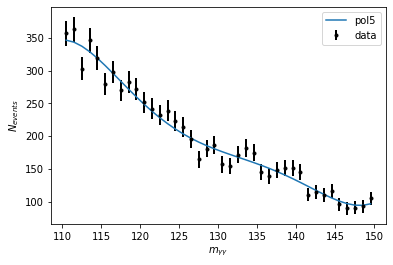

In [50]:
plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0,label="data")
plt.plot(x,result5,label="pol5")
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$N_{events}$")
plt.legend()
plt.show()

You can see its starting to pick up the fluctuations, if add even higher order polynomials, it will pick up even more fluctations. The f-test can tell us when we are adding too many polynomials. To see this, lets look at the residuals. 

Mean: 1.0861257446785584 	STD: 5.343399800440053
Mean: 0.057103092267087166 	STD: 1.4139559999956348
Mean: 0.03343373127646523 	STD: 0.9411203053614852


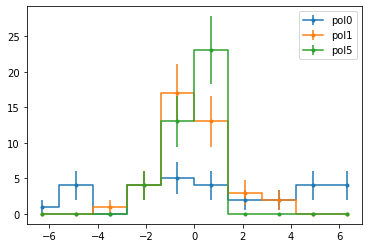

In [51]:
def residual(iY,iFunc,iYErr):
    resid = (iY-iFunc)/iYErr
    tmp_vals, tmp_bin_edges = np.histogram(resid, bins=10,range=[-7,7])
    tmp_bin_centers = 0.5*(tmp_bin_edges[1:] + tmp_bin_edges[:-1])
    print("Mean:",resid.mean(),"\tSTD:",resid.std())
    return tmp_bin_centers,tmp_vals

delta_p0,delta_y0 = residual(y,result0,y_err)
delta_p1,delta_y1 = residual(y,result1,y_err)
delta_p5,delta_y5 = residual(y,result5,y_err)
plt.errorbar(delta_p0,delta_y0,yerr=delta_y0**0.5,label="pol0",marker='.',drawstyle = 'steps-mid')
plt.errorbar(delta_p1,delta_y1,yerr=delta_y1**0.5,label="pol1",marker='.',drawstyle = 'steps-mid')
plt.errorbar(delta_p5,delta_y5,yerr=delta_y5**0.5,label="pol5",marker='.',drawstyle = 'steps-mid')
plt.legend()
plt.show()

So as we go to a higher order polynomial,we get to progressively smaller standard deviation. The issue is when do we stop. Lets now compute the f-statistic and compare it to our samples.  The f-statistic is defined at the ratio of the RMS distributions, we can write this as: 

\begin{equation}
 f = \frac{  \sigma^{2}_{\rm group} }{\sigma^{2}} \\
 \sigma^{2}_{\rm group} = \frac{ -\sum_{i=1}^{N} \left(y_{i}-f_{2}(x_{i})\right)^{2} + \sum_{i=1}^{N} \left(y_{i}- f_{1}(x_{i})\right)^{2}}{\Delta^{2\rightarrow 1}_{\rm dof}} \\
 \sigma^{2} = \frac{1}{N - n_{\rm f_{2}~dof} }\sum_{i=1}^{N} \left(y_{i}- f_{1}(x_{i})\right)^{2}
\end{equation}

or in other words the variation from a higher order polynomial to a lower order polynomial, should be smaller than the average variation of the residuals. This is the f-statistic. Let's compute the f-statistic for a few instances.

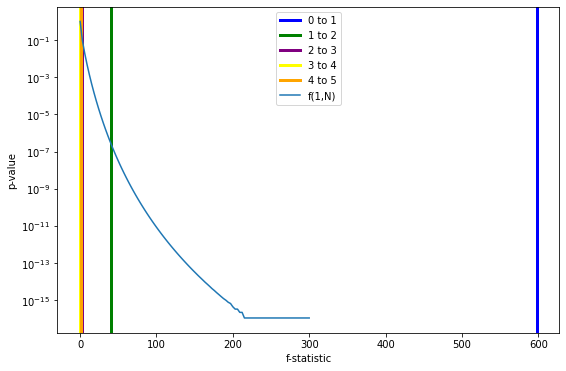

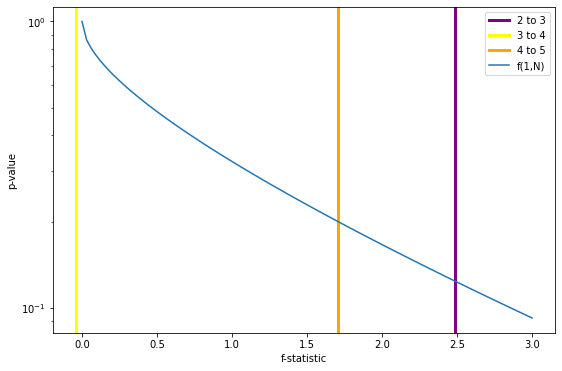

In [52]:
import scipy.stats as stats 

def residual2(iY,iFunc,iYErr):
    residval = (iY-iFunc)
    return np.sum(residval**2)
    
def ftest(iY,iYerr,f1,f2,ndof1,ndof2):
    r1=residual2(iY,f1,iYerr)
    r2=residual2(iY,f2,iYerr)
    sigma2group=(r1-r2)/(ndof2-ndof1)
    sigma2=r2/(len(y)-ndof2)
    return sigma2group/sigma2

f10=ftest(y,y_err,result0,result1,1,2)
f21=ftest(y,y_err,result1,result2,2,3)
f32=ftest(y,y_err,result2,result3,3,4)
f43=ftest(y,y_err,result3,result4,4,5)
f54=ftest(y,y_err,result4,result5,5,6)

xrange=np.linspace(0,300,100)
farr=1-stats.f.cdf(xrange,1,len(y)-5) 
fig, ax = plt.subplots(figsize=(9,6))

ax.axvline(x=f10,linewidth=3,c='b',label='0 to 1')
ax.axvline(x=f21,linewidth=3,c='g',label='1 to 2')
ax.axvline(x=f32,linewidth=3,c='purple',label='2 to 3')
ax.axvline(x=f43,linewidth=3,c='yellow',label='3 to 4')
ax.axvline(x=f54,linewidth=3,c='orange',label='4 to 5')

ax.set_yscale('log')
plt.plot(xrange,farr,label='f(1,N)')
plt.legend()
plt.xlabel('f-statistic')
plt.ylabel('p-value')
plt.show()

xrange=np.linspace(0,3,100)
farr=1-stats.f.cdf(xrange,1,len(y)-5) 
fig, ax = plt.subplots(figsize=(9,6))
ax.axvline(x=f32,linewidth=3,c='purple',label='2 to 3')
ax.axvline(x=f43,linewidth=3,c='yellow',label='3 to 4')
ax.axvline(x=f54,linewidth=3,c='orange',label='4 to 5')
ax.set_yscale('log')
plt.xlabel('f-statistic')
plt.plot(xrange,farr,label='f(1,N)')
plt.ylabel('p-value')
plt.legend()
plt.show()

So, we see that large probabilities are present already in the 2 to 3 transition, which means that we likely only need a 2nd order polynomial. Let's check the $\chi^{2}$ value as well. 

Mean: 0.04077706861139911 	STD: 1.038701227618278
chi2 prob: 0.22275029606005603
Normalized chi2: 1.1681762265732507


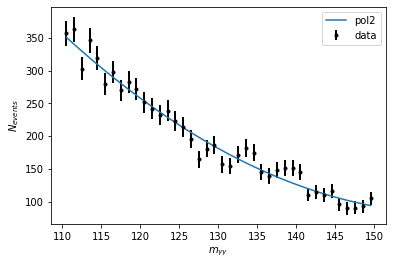

In [55]:
def chi2(iY,iFunc,iYErr,iNDOF):
    resid = (iY-iFunc)/iYErr
    chi2value = np.sum(resid**2)
    print("Mean:",resid.mean(),"\tSTD:",resid.std())
    chi2prob=1-stats.chi2.cdf(chi2value,len(iY)-iNDOF)
    print("chi2 prob:",chi2prob)
    return chi2value/(len(iY)-iNDOF)

chi2value=chi2(y,result2,y_err,3)
print("Normalized chi2:",chi2value)
plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0,label="data")
plt.plot(x,result2,label="pol2")
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$N_{events}$")
plt.legend()
plt.show()

Overall, this show the signs of a good fit.

### Challenge Question
Compare the $\chi^{2}$ probabilities of the fit? Could we have just done this with a $\chi^{2}$ test? 

In [65]:
#chi2(y,result1,y_err,2)
chi2(y,result1,y_err,2)

Mean: 0.057103092267087166 	STD: 1.4139559999956348
chi2 prob: 7.8026488651739e-05


2.107928771652756

### 9.3 Fitting for the Higgs boson signal Background

With all of these pieces together, I would like to compute the significance of the Higgs boson discovery in one of its main channels. To do this, we are going to use all of the tools that we have been going over. Let's first look at the data. For the Higgs boson data, there are 2 years of data each with 5 categories. Here is what all of them look like. 

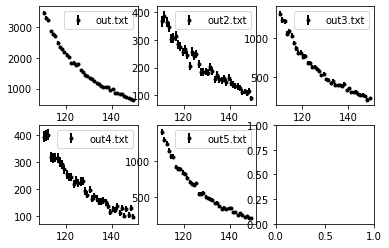

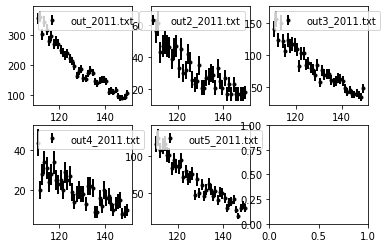

In [66]:
def load(iLabel,iRange=False):
    x = np.array([])
    y = np.array([])
    label=iLabel
    with open(label,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter=' ')
        for row in plots:
            if not iRange and (float(row[1]) > 150 or float(row[1]) < 110):
                continue
            x = np.append(x,float(row[1]))
            y = np.append(y,float(row[2]))
            #add poisson uncertainties                                                                                                 
    weights = 1./y**0.5 
    return x,y,y**0.5,weights

def plot(ax,iLabel):
    x,y,y_err,weights=load(iLabel)
    #Now we plot it. 
    ax.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0,label=iLabel)
    #ax.x_label("$m_{\gamma\gamma}$")
    #ax.y_label("$N_{events}$")
    ax.legend()
    #ax.show()
    
fig, axs = plt.subplots(2, 3)
#2012 data    
plot(axs[0,0],"out.txt")
plot(axs[0,1],"out2.txt")
plot(axs[0,2],"out3.txt")
plot(axs[1,0],"out4.txt")
plot(axs[1,1],"out5.txt")
plt.show()

fig, axs = plt.subplots(2, 3)
#2011 data    
plot(axs[0,0],"out_2011.txt")
plot(axs[0,1],"out2_2011.txt")
plot(axs[0,2],"out3_2011.txt")
plot(axs[1,0],"out4_2011.txt")
plot(axs[1,1],"out5_2011.txt")

As you can see, from the above plots, there are way more points in the 2012 data. Lets take the category with the largest number of points, and perform an f-test on it, we can neglect the signal for now, but we will get back to that in a sec.  

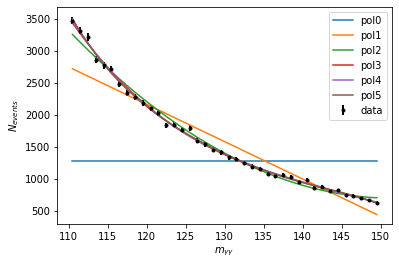

f 1 to 0: 1.1102230246251565e-16
f 2 to 1: 1.1102230246251565e-16
f 3 to 2: 1.0090073221391549e-10
f 4 to 3: 0.04898837901288067
f 5 to 4: 0.07569253451808633
out2 Test


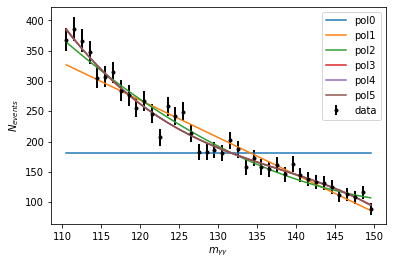

f 1 to 0: 1.1102230246251565e-16
f 2 to 1: 4.937240960511957e-08
f 3 to 2: 0.0035138407452814935
f 4 to 3: 0.8546368491590365
f 5 to 4: 0.9746177621262444


In [68]:
def fitAll(iLabel,iPlot=False):
    x,y,y_err,weights=load(iLabel)
    result0 = fitModel(x,y,weights,pol0)
    result1 = fitModel(x,y,weights,pol1)
    result2 = fitModel(x,y,weights,pol2)
    result3 = fitModel(x,y,weights,pol3)
    result4 = fitModel(x,y,weights,pol4)
    result5 = fitModel(x,y,weights,pol5)

    if iPlot:
        plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0,label="data")
        plt.plot(x,result0,label="pol0")
        plt.plot(x,result1,label="pol1")
        plt.plot(x,result2,label="pol2")
        plt.plot(x,result3,label="pol3")
        plt.plot(x,result4,label="pol4")
        plt.plot(x,result5,label="pol5")
        plt.xlabel("$m_{\gamma\gamma}$")
        plt.ylabel("$N_{events}$")
        plt.legend()
        plt.show()
    return x,y,y_err,result0,result1,result2,result3,result4,result5

def ftestAll(iLabel):
    x,y,y_err,result0,result1,result2,result3,result4,result5=fitAll(iLabel)
    f10=ftest(y,y_err,result0,result1,1,2)
    f21=ftest(y,y_err,result1,result2,2,3)
    f32=ftest(y,y_err,result2,result3,3,4)
    f43=ftest(y,y_err,result3,result4,4,5)
    f54=ftest(y,y_err,result4,result5,4,5)
    print("f 1 to 0:",1-stats.f.cdf(f10,1,len(y)-1))
    print("f 2 to 1:",1-stats.f.cdf(f21,1,len(y)-2))
    print("f 3 to 2:",1-stats.f.cdf(f32,1,len(y)-3))
    print("f 4 to 3:",1-stats.f.cdf(f43,1,len(y)-4))
    print("f 5 to 4:",1-stats.f.cdf(f54,1,len(y)-5))
    
fitAll("out.txt",True)
ftestAll("out.txt")

print("out2 Test")
fitAll("out2.txt",True)
ftestAll("out2.txt")

So from this looks like a 4th order polynomialgives an f-test above roughly 5% for both the category with the largest yield and the second largest yield. This seems reaonsable for us to use as our background function. Let's proceed with a signal function. 

## 9.4 Fitting a Higgs Signal

Now, to fit a Higgs signal, what we want to do is a hypothesis test like we did above. Except now, we will cast our hypothesis, slightly differently to before. 

**Null Hypothesis** The Higgs signal has a mass of $m_{\gamma\gamma}$ at a specific $m_{0}$, and a fixed width 1.2 GeV. 

**Alternative Hypothesis** The Higgs signal is not there. 

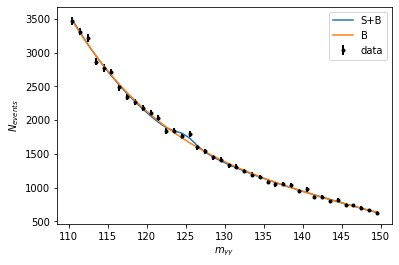

2NLL: 8.213184541663907 p-value 0.00415871013208724


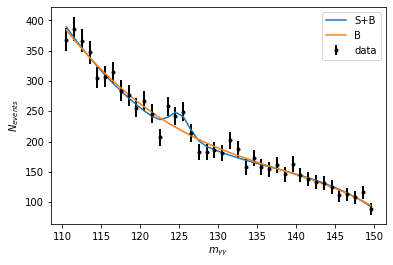

2NLL: 7.483846468005588 p-value 0.006225493842686447


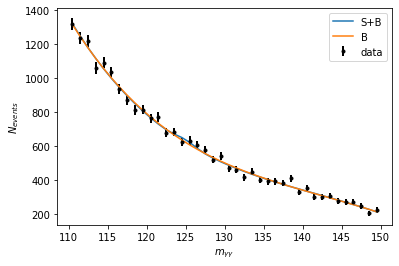

2NLL: 1.0484335987044346 p-value 0.30586811912214484


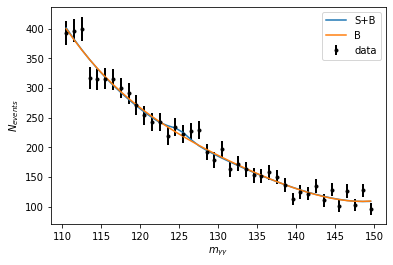

2NLL: 0.5629811640785931 p-value 0.45306157392878643


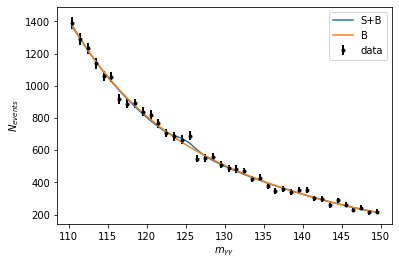

2NLL: 2.5781257594511757 p-value 0.10834988569359849


In [69]:
def sigpol4(x,p0,p1,p2,p3,p4,amp,mass,sigma):
    bkg=pol4(x,p0,p1,p2,p3,p4)
    sig=amp*stats.norm.pdf(x,mass,sigma)
    return sig+bkg

def fitModel(iX,iY,iWeights,iM,iFunc):
    model  = lmfit.Model(iFunc)
    p = model.make_params(p0=0,p1=0,p2=0,p3=0,p4=0,p5=0,amp=0,mass=iM,sigma=1.2)
    try:
        p["mass"].vary=False
        p["sigma"].vary=False
    except:
      a=1
      #print("Mass and Sigma not in fit")
    result = model.fit(data=iY,params=p,x=iX,weights=iWeights)
    output = model.eval(params=result.params,x=iX)
    return output,result.residual

def fitSig(iLabel,iM,SBfunc,Bfunc,iPlot=False):
    x,y,y_err,weights=load(iLabel)
    resultSB,likeSB=fitModel(x,y,weights,iM,SBfunc)
    resultB, likeB =fitModel(x,y,weights,iM,Bfunc)
    if iPlot:
        plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0,label="data")
        plt.plot(x,resultSB,label="S+B")
        plt.plot(x,resultB, label="B")
        plt.xlabel("$m_{\gamma\gamma}$")
        plt.ylabel("$N_{events}$")
        plt.legend()
        plt.show()
    return np.sum(likeB**2)-np.sum(likeSB**2)

NLL=fitSig("out.txt",125,sigpol4,pol4,True)
print("2NLL:",NLL,"p-value",1-stats.chi2.cdf(NLL,1))

NLL=fitSig("out2.txt",125,sigpol4,pol4,True)
print("2NLL:",NLL,"p-value",1-stats.chi2.cdf(NLL,1))

NLL=fitSig("out3.txt",125,sigpol4,pol4,True)
print("2NLL:",NLL,"p-value",1-stats.chi2.cdf(NLL,1))

NLL=fitSig("out4.txt",125,sigpol4,pol4,True)
print("2NLL:",NLL,"p-value",1-stats.chi2.cdf(NLL,1))

NLL=fitSig("out5.txt",125,sigpol4,pol4,True)
print("2NLL:",NLL,"p-value",1-stats.chi2.cdf(NLL,1))

Wow, we see a fairly significant Higgs bump at 125, but lets scan the mass and make the so called p-value plot. This is just a plot of the significance as a function of mass. 

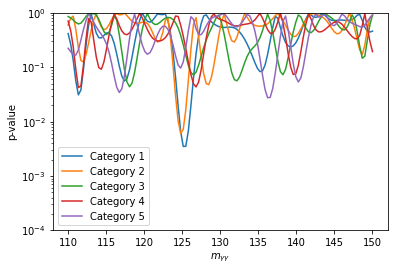

In [70]:
def pvalueCalc(iLabel,pMass,iSBFunc,iBFunc):
    NLL=fitSig(iLabel,pMass,iSBFunc,iBFunc,False)
    NLLp = 1-stats.chi2.cdf(NLL,1)
    return NLLp

def pvaluePlot(iLabel,iSBFunc,iBFunc):
    pvalue = np.array([])
    massrange=np.linspace(110,150,120)
    for pMass in massrange:
        pvalue = np.append(pvalue,pvalueCalc(iLabel,pMass,iSBFunc,iBFunc))
    return massrange,pvalue

m0,p0 = pvaluePlot("out.txt",sigpol4,pol4)
m1,p1 = pvaluePlot("out2.txt",sigpol4,pol4)
m2,p2 = pvaluePlot("out3.txt",sigpol4,pol4)
m3,p3 = pvaluePlot("out4.txt",sigpol4,pol4)
m4,p4 = pvaluePlot("out5.txt",sigpol4,pol4)

plt.plot(m0,p0,label="Category 1")
plt.plot(m1,p1,label="Category 2")
plt.plot(m2,p2,label="Category 3")
plt.plot(m3,p3,label="Category 4")
plt.plot(m4,p4,label="Category 5")
plt.ylim((0.0001,1))
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("p-value")
plt.yscale("log")
plt.legend()
plt.show()

### Challenge Question
Compute the Higgs boson p-value signficance plot for category 1 with a 5th order polynomial? How does it compare. 

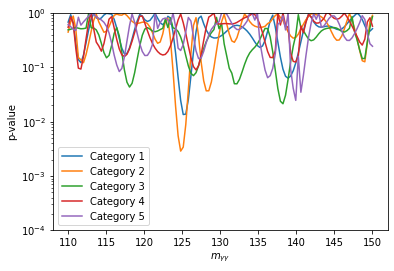

In [71]:
def pol5(x, p0, p1,p2,p3,p4,p5):
    pols=[p0,p1,p2,p3,p4,p5]
    y = np.polyval(pols,x)
    return y

def sigpol5(x,p0,p1,p2,p3,p4,p5,amp,mass,sigma):
    bkg=pol5(x,p0,p1,p2,p3,p4,p5)
    sig=amp*stats.norm.pdf(x,mass,sigma)
    return sig+bkg

m0,p0 = pvaluePlot("out.txt",sigpol5,pol5)
m1,p1 = pvaluePlot("out2.txt",sigpol5,pol5)
m2,p2 = pvaluePlot("out3.txt",sigpol5,pol5)
m3,p3 = pvaluePlot("out4.txt",sigpol5,pol5)
m4,p4 = pvaluePlot("out5.txt",sigpol5,pol5)

plt.plot(m0,p0,label="Category 1")
plt.plot(m1,p1,label="Category 2")
plt.plot(m2,p2,label="Category 3")
plt.plot(m3,p3,label="Category 4")
plt.plot(m4,p4,label="Category 5")
plt.ylim((0.0001,1))
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("p-value")
plt.yscale("log")
plt.legend()
plt.show()

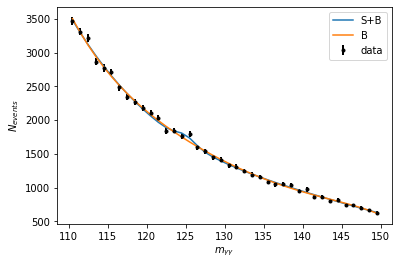

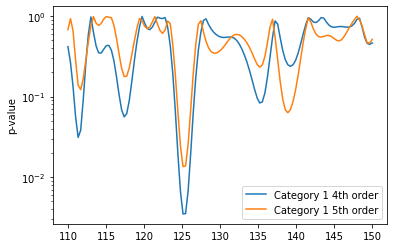

In [20]:
#answer
def sigpol5(x,p0,p1,p2,p3,p4,p5,amp,mass,sigma):
    bkg=pol5(x,p0,p1,p2,p3,p4,p5)
    sig=amp*stats.norm.pdf(x,mass,sigma)
    return sig+bkg

NLL=fitSig("out.txt",125,sigpol5,pol5,True)


m03,p03 = pvaluePlot("out.txt",sigpol5,pol5)
plt.plot(m0,p0,label="Category 1 4th order")
plt.plot(m03,p03,label="Category 1 5th order")
plt.ylabel("p-value")
plt.yscale("log")
plt.legend()
plt.show()

#The 5th order polynomial is much less sensivitive since there are more degrees of freedom

## 9.5 Combining p-values

Now, if we have 5 experiments each giving a p-value at a specific mass point. How, do we combine these p-values. The strategy is to realize these are each independent experiments. Moreover, it can be shown that if you have a flat prior in probability, and if you take the log of this prior and multiply by 2 $2\log(p)$ this distribution is approximately that of a $\chi^{2}$ distribution of 2 degrees of freedom. 


We can see this analytically by noting that $\chi^{2}$ distribution is given by 

\begin{equation}
\chi^{2}(x,\nu) = \frac{1}{2^{\nu/2}\Gamma(\nu/2)} x^{\nu/2-1}e^{-x/2}
\end{equation}

For $\nu=2$, we have it is just a an exponential distribution given by:

\begin{equation}
\chi^{2}(x,\nu=2) = \frac{1}{2}e^{-x/2}
\end{equation}

Now for a distribution that is flat is distribution from 0 to 1, such as the $p-value$ of a random measurement. Then if we take the log of that, we find
\begin{equation}
 y = -2\log(x)\rightarrow e^{-\frac{y}{2}}=x \\
 dx = -\frac{1}{2}e^{\frac{-y}{2}} dy \\
\end{equation}
To equate probability distributions, we want to solve for scenario where the probabilities over a range are equal, namely, to get it as a function of $y$, we can write, noting $p(x)=1$
\begin{equation}
 p(y) dy = p(x) dx \\
 p(y) = p(x) \frac{dx}{dy}\\
 p(y) = p(f^{-1}(y)) \frac{dx}{dy}\\
 p(y) = \frac{dx}{dy} \\
 p(y)=e^{-\frac{y}{2}} \\
\end{equation}
or for $x$ a flat distribution, we have that $y$ has to be distributed such that $p(y)=e^{-\frac{y}{2}}$ 

Text(0, 0.5, 'N')

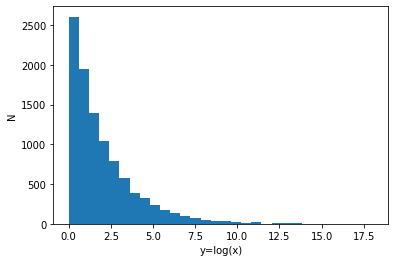

In [21]:
samples = np.random.uniform(0,1,10000)
plt.hist(-2.*np.log(samples),bins=30)
plt.xlabel("y=log(x)")
plt.ylabel("N")

Now going back to our calculation, we can immediately relate 
\begin{equation}
\chi^{2}_{\nu=2} = -2 \log(p_{i})
\end{equation}
Now, lets say we have $n$ measurements each with probability $p_{i}$ for the i-th category. If we take the $2\log(p_{i})$ and sum the distributions, we have a sum of $\chi^{2}$ distributions of 2 degrees of freedom. This is just a $\chi^{2}_{\nu=2n}$ distribution. 

\begin{equation}
\chi^{2}_{\nu=2n} = -2 \sum_{i=1}^{n} \log(p_{i})
\end{equation}

From this relation, we can immediately get the combined p-value by checking up the p-value of a $\chi^{2}_{\nu=2n}$ distribution.  Lets see this in action!

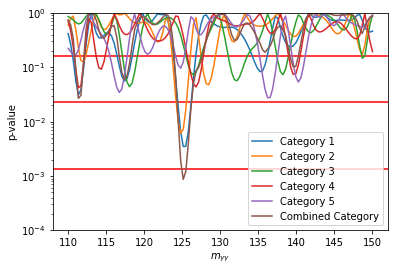

In [18]:
def pvalueCalc(iLabel,pMass,iSBFunc,iBFunc):
    logp=0
    for pLabel in iLabel:
        NLL=fitSig(pLabel,pMass,iSBFunc,iBFunc,False)
        NLLp = 1.-stats.chi2.cdf(NLL,1)
        logp = logp - 2.*np.log(NLLp)
    pPVal  = 1-stats.chi2.cdf(logp,2*len(iLabel))
    return pPVal

files=["out.txt","out2.txt","out3.txt","out4.txt","out5.txt"]
mC,pC = pvaluePlot(files,sigpol4,pol4)

for pVal in range(4):
    sigmas = 1-stats.norm.cdf(pVal+1)
    plt.axhline(y=sigmas, color='r', linestyle='-')
plt.plot(m0,p0,label="Category 1")
plt.plot(m1,p1,label="Category 2")
plt.plot(m2,p2,label="Category 3")
plt.plot(m3,p3,label="Category 4")
plt.plot(m4,p4,label="Category 5")
plt.plot(mC,pC,label="Combined Category")
plt.ylim((0.0001,1))
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("p-value")
plt.yscale("log")
plt.legend()
plt.show()


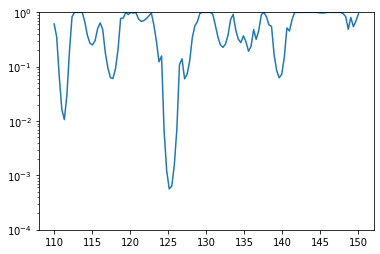

In [597]:
plt.plot(mC,pC,label="Category 1")
plt.ylim((0.0001,1))
plt.yscale("log")

Ok, now that we have done that, lets compare our result for the 8TeV measurement in the original paper [here](https://arxiv.org/pdf/1407.0558.pdf). If you look at that plot, you will see that there is a significance of almost 4 standard deviations for the 8TeV data, whereas we only have 3 standard deviations. The reason is that the analysis in the paper is more complicated. To compare our result with something closer, look at the Higgs discovery [paper](https://arxiv.org/pdf/1207.7235.pdf). Here, we are more sensitive, but we also have more data. 

### Challenging Challenge Question 

Compute the best fit mass for the Higgs boson? How does it compare to the true value

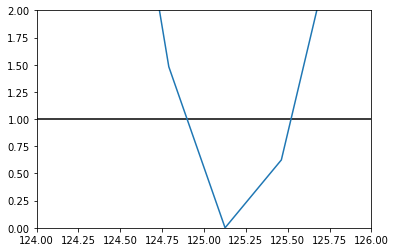

In [616]:
#Answer, the strategy here is to realize that p-value plot is also 2*Log(L) of our best fit, thus, we just need to go 1 standard deviation from the minimum in likelihood
logC = stats.chi2.ppf(1-pC,1)
logC = -logC+np.max(logC)
plt.plot(mC,logC,label="Combined")
plt.ylim(0,2)
plt.xlim(124,126)
plt.hlines(1,120,130)
plt.show()
#Its roughly 124.8-125.5 => 125.2+/-0.35 (Its almost spot on!)

## 9.6 Building Interpolated distributions

To find the right fit function, we used a library of functions to profile and find the minimum. Thanks to the f-statistic, we don't need to just throw one function at the problem, we can throw many. In fact, modern searches aiming for the most sensitivity will send a library of functions to fit a signal and not just one. For a more detailed analysis of how you would do this look at this [paper](https://arxiv.org/pdf/1408.6865.pdf). 

However, what we can also do is actually build functions by just throwing it to the data. To give you two ways to do this, let's first try a spline interpolated function. 

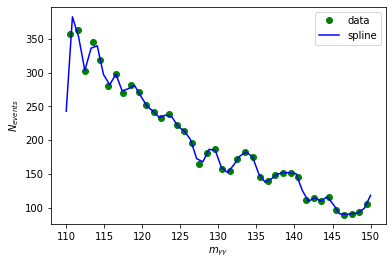

In [73]:
#Now lets load some data and do gaussian kernals with it
x,y,y_err,weights=load("out_2011.txt")


from scipy import interpolate
tck = interpolate.splrep(x, y) #setup the spline
x2 = np.linspace(110, 150) #range
y2 = interpolate.splev(x2, tck)#apply the spline

plt.plot(x, y, 'go',label='data')
plt.plot(x2, y2, 'b',label='spline')
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$N_{events}$")
plt.legend()
plt.show()

So what happened is, we just took the data and turned it into a smooth function that we can evaulate anywhere. This is done by chunking up the data into little pieces and fitting higher order polynomials to each. We end up with a function. 

Since its a function, we can do whatever we want with it. Let's smooth this function out by convolving it with a Gaussian distribution. 

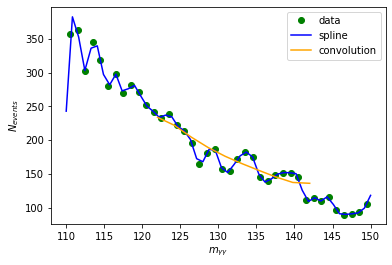

In [78]:
#spline convolve by hand
def splineconvolve(tck,f2,x,iMin=-15,iMax=15,iN=500):
    step=float((iMax-iMin))/float(iN)
    pInt=0
    for i0 in range(iN):
            pX   = i0*step+iMin
            pVal = interpolate.splev(x-pX,tck)*f2(pX)
            pInt += pVal*step
    return pInt

def gaussian(x,mean=0,sigma=5):
    return 1./(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * sigma**2)) 

fig, ax = plt.subplots()
x_in=np.linspace(122, 142, 10)
conv_out=[]
for val in x_in:
    pConv_out=splineconvolve(tck,gaussian,val)
    conv_out.append(pConv_out)

#now we cna plot it
plt.plot(x, y, 'go',label='data')
plt.plot(x2, y2, 'b',label='spline')
plt.plot(x_in,conv_out,c='orange',label='convolution')
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$N_{events}$")
plt.legend()
plt.show()

In fact, in recent times interpolation with all sorts of functions, not just polynomials have become very popular. Just to show you another one that is used often, lets try Gaussian processes. Gaussian processes, aim to fit guassian distributiosn to describe the data. The strategy, conceptually, is like the f-test. Keep adding Gaussian's to fit the data until it is well described. See [here](https://en.wikipedia.org/wiki/Gaussian_process) for a much deeper explanation for how this would work. 

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


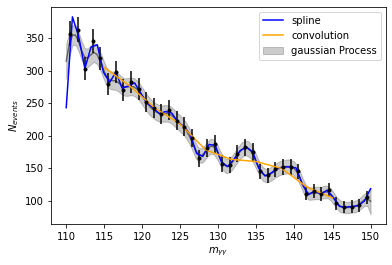

In [47]:
!pip install george
import george
from george import kernels

kernel = np.var(y) * kernels.Matern52Kernel(5.0)
#kernel = np.var(y) * kernels.Matern52Kernel(125.0)
gp = george.GP(kernel)
gp.compute(x, y_err)
x_pred = np.linspace(110, 150, 100)
pred, pred_var = gp.predict(y, x_pred, return_var=True)

plt.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),color="k", alpha=0.2,label="gaussian Process")
plt.plot(x_pred, pred, "k", lw=1.5, alpha=0.5)
plt.errorbar(x, y, yerr=y_err, fmt=".k", capsize=0)
plt.plot(x2, y2, 'b',label='spline')
plt.plot(x_in,conv_out,c='orange',label='convolution')
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$N_{events}$")
plt.legend()
plt.show()

As with the spline, there are parameters for how it averages over the points. Try the kernal 125 above, you will see that this is is effectively changing the size of the window of interpolation. This will allow us to either smooth or unsmooth our distribution.  

## 9.7 Dealing with non-analytic forms

At this point, we have gone a bit away from just fitting functions. Its not always the case that we have a nice function that we can fit to describe our data. It is sometimes the case that we have a simulated shape. For High energy physics, simulated shapes often come from so called "Monte-Carlo" simulation. In this approach, we construct distributions by randomly sampling many millions of events. The resulting simulated events can then be treated like data. The data set below represents another Higgs boson channel, the Higgs decay to 4 leptons. However, in this instance, we want to fit the peak at 90 with a simulation of the peak. 

No handles with labels found to put in legend.


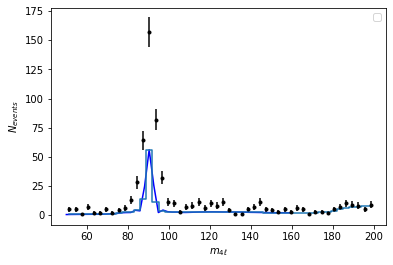

In [83]:
x,y_data,y_err,weights=load("data.txt",True)
x,y_mc,y_mc_err,_=load("zz_narrow.txt",True)

tck = interpolate.splrep(x, y_mc)
x2 = np.linspace(50, 160)
y2 = interpolate.splev(x2, tck)
plt.errorbar(x,y_data,yerr=y_err,marker='.',linestyle = 'None', color = 'black')
plt.plot(x2, y2, 'b')
plt.plot(x,y_mc,drawstyle = 'steps-mid')
plt.xlabel("$m_{4\ell}$")
plt.ylabel("$N_{events}$")
plt.legend()
plt.show()

There are clearly a few things off. First of all the number of events is off. Secondly, the shapes don't look exactly the same. 

Oftentimes, when we actually want to do a precision fit, we will rely on our simulated samples to extract the signal. What we will do is allow the shape to be modified by a number of different approaches. One appraoch is to apply a numerical convolution of the shape with a gaussian distribution, so that we can smear it out, making it wider. This what we will do here. 

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 43
    # data points      = 50
    # variables        = 5
    chi-square         = 145.608969
    reduced chi-square = 3.23575487
    Akaike info crit   = 63.4450865
    Bayesian info crit = 73.0052015
[[Variables]]
    mean:   0.48123442 +/- 0.45208873 (93.94%) (init = 0)
    sigma:  2.27940580 +/- 0.52715592 (23.13%) (init = 0.1)
    amp:    3.00074461 +/- 0.32361284 (10.78%) (init = 3)
    a:      4.76540323 +/- 1.50430047 (31.57%) (init = 1)
    b:     -0.06266022 +/- 0.01320916 (21.08%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b)   = -0.837
    C(amp, b) = -0.513


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

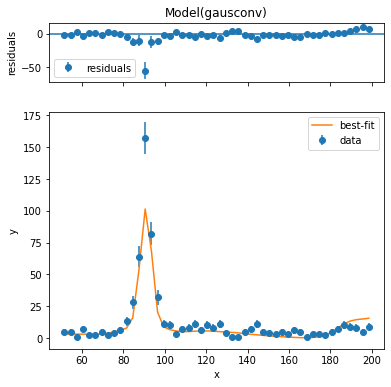

In [122]:
#spline convolve by hand
def splineconvolvegaus(x,mean,sigma,iMin=-15,iMax=15,iN=500):
    step=float((iMax-iMin))/float(iN)
    pInt=0
    for i0 in range(iN):
            pX   = i0*step+iMin
            pVal = interpolate.splev(x-pX,tck)*gaussian(pX,mean,sigma)
            pInt += pVal*step
    return pInt

def gausconv(x,mean,sigma,amp,a,b):
    val=splineconvolvegaus(x,mean,sigma)*amp
    val=a + b*x + val
    return val

model  = lmfit.Model(gausconv)
p = model.make_params(mean=0,sigma=1.0,amp=3.0,a=1,b=0)
p["sigma"].value=0.1
#p["sigma"].vary=False
result = model.fit(data=y_data,params=p,x=x,weights=weights)
lmfit.report_fit(result)
result.plot()

In [ ]:
def splineconvolvegaus(tck,f2,x,mean,sigma,iMin=-15,iMax=15,iN=500):
    step=float((iMax-iMin))/float(iN)
    pInt=0
    for i0 in range(iN):
            pX   = i0*step+iMin
            pVal = interpolate.splev(x-pX,tck)*f2(pX,mean,sigma)
            pInt += pVal*step
    return pInt

def gausconv(x,mean,sigma,sig,baseline,slope):
    val=splineconvolvegaus(tck,gaussian,x,mean,sigma)
    output = baseline+sig*val+slope*x
    return output

model  = lmfit.Model(gausconv)
p = model.make_params(mean=0,sigma=1,sig=2,baseline=2,slope=0)
p["mean"].vary = False
result = model.fit(data=y_data, params=p, x=x, weights=weights)
lmfit.report_fit(result)
result.plot()

#Now lets not smear the data
p["sigma"].value = 0.01
p["sigma"].vary = False
result = model.fit(data=y_data, params=p, x=x, weights=weights)
lmfit.report_fit(result)
result.plot()

## 9.8 Going beyond

This is just the start of construction fit functions. The next set of tools we can explore is how to build deep learning algorithms to model the data. 